<a href="https://colab.research.google.com/github/NaNa0369/SA_2025/blob/main/sa2025_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading YOUR actual datasets...
Reading train.csv and test.csv from your files...
Training data shape: (1966, 9)
Testing data shape: (312, 8)
Training columns: ['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'age_group']
Test columns: ['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

EXPLORATORY DATA ANALYSIS

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB
None


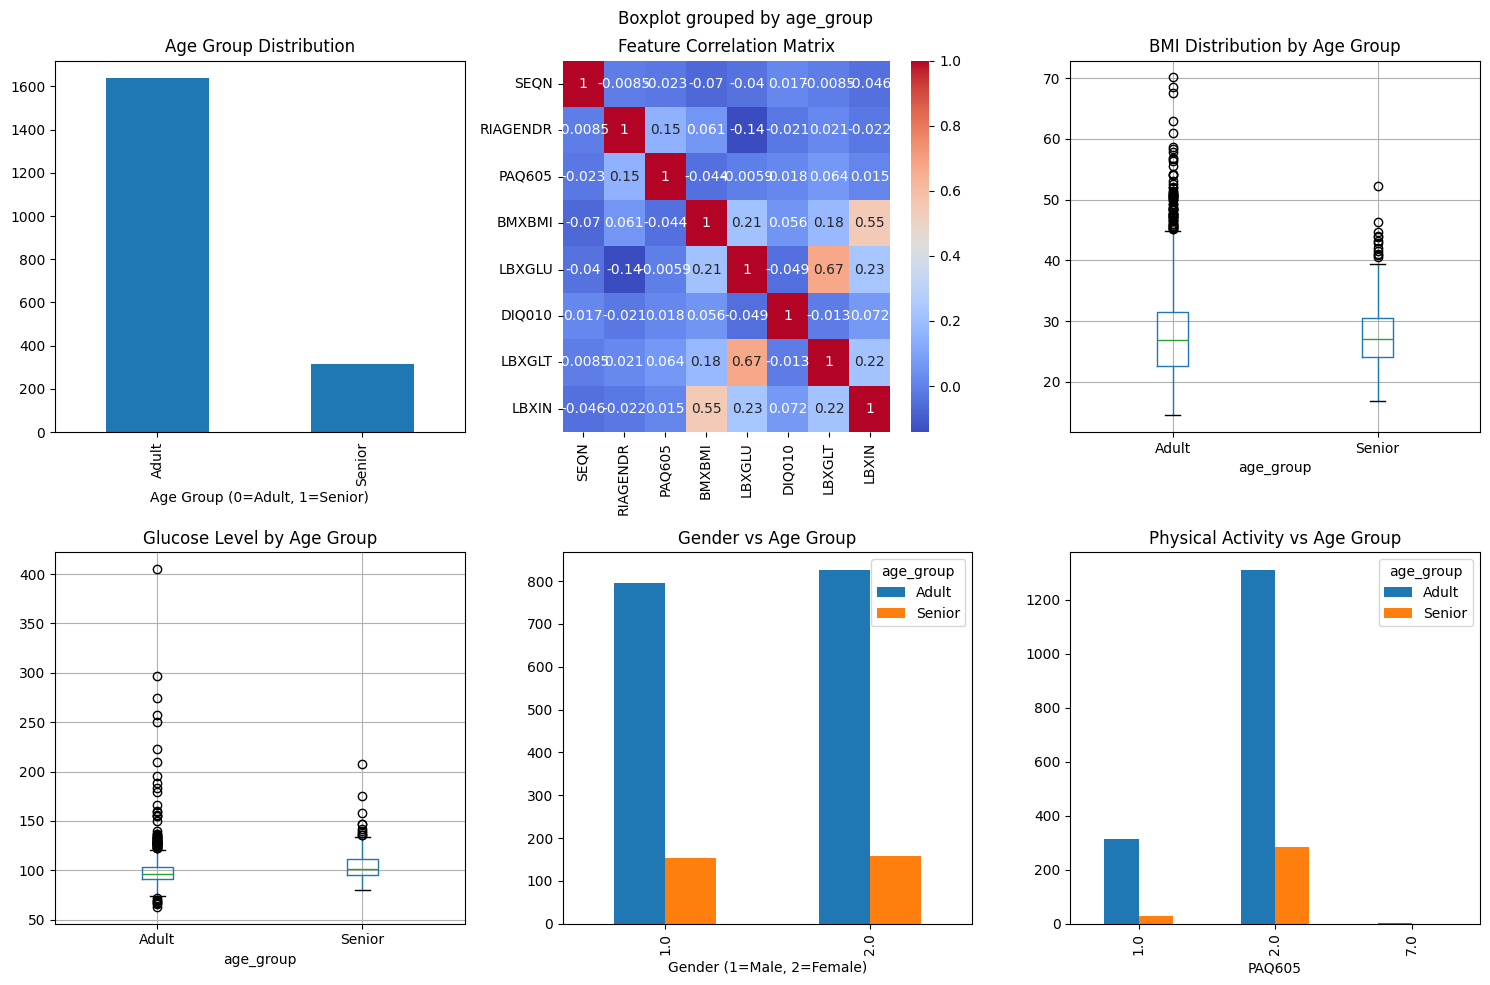


FEATURE ENGINEERING
Checking target variable...
Missing values in age_group: 14
Removing 14 rows with missing target values...
Training data shape after removing missing targets: (1952, 9)
Unique target values: ['Adult' 'Senior']


ValueError: invalid literal for int() with base 10: 'Adult'

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer

# 📥 Load Data
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")
sample_submission_df = pd.read_csv("Sample_Submission.csv")

# 🧹 Preprocessing
train_df["age_group"] = train_df["age_group"].map({"Adult": 0, "Senior": 1})
train_df = train_df.dropna(subset=["age_group"])

for col in train_df.columns:
    if train_df[col].isnull().any():
        train_df[col].fillna(train_df[col].median(), inplace=True)

for col in test_df.columns:
    if test_df[col].isnull().any():
        test_df[col].fillna(test_df[col].median(), inplace=True)

X_train = train_df.drop(columns=["SEQN", "age_group"])
y_train = train_df["age_group"]
X_test = test_df.drop(columns=["SEQN"])

# 🤖 Model Training
model = RandomForestClassifier(random_state=42, n_estimators=100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1)
print(f"Mean F1 Score: {cv_scores.mean():.4f} | Std Dev: {cv_scores.std():.4f}")

model.fit(X_train, y_train)

# 📈 Predict and Save Submission
preds = model.predict(X_test)
submission = sample_submission_df.copy()
submission["age_group"] = preds.astype(int)
submission.to_csv("submission.csv", index=False)
submission.head()